image size (300, 332)

 original image


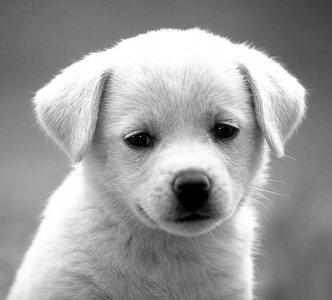


 2D convolution


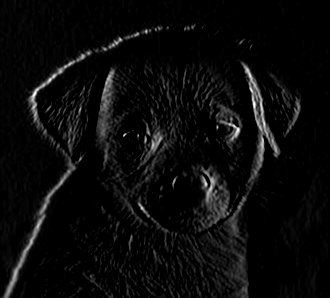


 Applying sobel filter horizontal and vertical and performing two 1D convolutions

 first 1D convolution


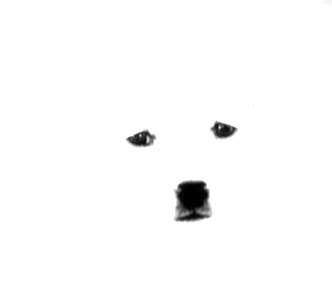


 second 1D convolution


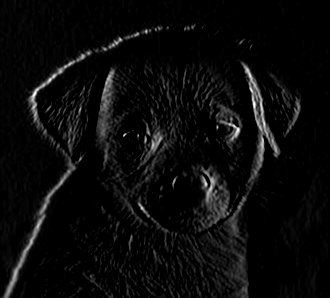

final images from single 2D convolution and seperate two 1D convolution


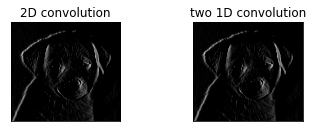

In [10]:
# for displaying image in google colab
from google.colab.patches import cv2_imshow 
import matplotlib.pyplot as plt
import numpy as np
import cv2

# common fucntion for calculating 2D and 1D convolution
def conv(image,kernel):
  # get image and kernel shape
  m, n = kernel.shape
  y, x = image.shape
  y = y - m + 1
  # perform 2D convolution if m==n 
  if (m == n):
    x = x - m + 1
    k = m
  # perform 1D convolution if m!=n
  else:
    x = x - n + 1
    k = n
  # perform multiplication and return new image
  # if its 2D convolution then its m*m so k is same as m
  # if its 1D convolution horizontal or vertical its m*n so k is n
  new = np.zeros((y,x))
  for i in range(y):
    for j in range(x):
      new[i][j] = np.sum(image[i:i+m, j:j+k]*kernel)

  return new

# this function reads image and gives final output
def main():
  # load the image from the path
  img = cv2.imread('/content/B2DBy.jpg',cv2.IMREAD_GRAYSCALE)
  print("image size",img.shape)
  
  print("\n original image")
  cv2_imshow(img)

  # remove noise from the image
  img = cv2.GaussianBlur(img,(3,3),0)
  
  # sobel filter kernel and reshape to form 3 by 3 matrix
  kernel = np.asarray([-1, 0, 1, -2, 0, 2, -1, 0, 1]).reshape(3,3)

  # 2D convolution on image
  x1 = conv(img,kernel)
  print("\n 2D convolution")
  cv2_imshow(x1)

  # two 1D convolution sobel filter
  print("\n Applying sobel filter horizontal and vertical and performing two 1D convolutions")
  
  # first 1D kernel 
  kernel = np.asarray([1, 2, 1]).reshape(3,1)
  print("\n first 1D convolution")
  x2 = conv(img, kernel)
  cv2_imshow(x2)

  # second 1D kernel 
  kernel = np.asarray([-1, 0, 1]).reshape(1,3)
  print("\n second 1D convolution")
  x3 = conv(x2, kernel)
  cv2_imshow(x3)

  # plot final images of 2D convolution and two 1D convolution side by side 
  print("final images from single 2D convolution and seperate two 1D convolution")
  plt.subplot(2,2,1),plt.imshow(x1,cmap='gray', vmin=0, vmax=255)
  plt.title('2D convolution'), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,2),plt.imshow(x3,cmap='gray', vmin=0, vmax=255)
  plt.title('two 1D convolution'), plt.xticks([]), plt.yticks([])

  plt.show()
  
  
if __name__:main()
